# Data Import and Inspection with Pandas

In [1]:
# Import the pandas library and alias it as pd for easier reference.
import pandas as pd

# Define the file path to the CSV file containing the data.
file = "/Users/yathisha/Downloads/un-general-debates-blueprint.csv"

# Use pandas to read the CSV file and store the data in a DataFrame called df.
df = pd.read_csv(file)

# Display the first 20 rows of the DataFrame to inspect the data.
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [6]:
import regex as re


# Stopwords Retrieval with NLTK

In [7]:
# Define a function called tokenize that takes a piece of text as input and returns a list of tokens.
def tokenize(text):
    # Use the regular expression module (re) to find all word-like tokens containing letters or hyphens.
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Define a function called remove_stop that takes a list of tokens as input and removes any tokens that are stopwords.
def remove_stop(tokens):
    # Use a list comprehension to iterate over each token in the input list, keeping only those tokens that are not in the stopwords set.
    return [t for t in tokens if t.lower() not in stopwords]

# Define a pipeline, which is a sequence of functions to be applied to text data.
pipeline = [str.lower,tokenize,remove_stop]



# Text Preprocessing Function Definition

In [8]:
# Define a function named prepare that takes a piece of text and a pipeline of functions as input.
def prepare(text, pipeline):
    # Initialize the tokens variable with the input text.
    tokens = text
    # Iterate over each function in the pipeline.
    for fun in pipeline:
        # Apply the current function to the tokens.
        tokens = fun(tokens)
    # Return the final processed tokens.
    return tokens

# The result is stored in a new column named 'tokens'.
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)


# Token Frequency Analysis

In [9]:
# Import the Counter class from the collections module.
from collections import Counter

# Create a Counter object to count the frequency of tokens.
counter = Counter()

# Update the Counter object with the tokens from the 'tokens' column of the DataFrame using the map() function.
df['tokens'].map(counter.update)

# Set the index to the tokens and name the columns 'freq'.
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])

# Filter the DataFrame to include only tokens with a frequency of 1 or more.
freq_df = freq_df.query('freq >= 1')

# Set the name of the index column to 'token'.
freq_df.index.name = 'token'

# Sort the DataFrame by frequency in descending order.
freq_df = freq_df.sort_values('freq', ascending=False)

# Display the top 10 most frequent tokens.
freq_df.head(10)


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Word Cloud Visualization

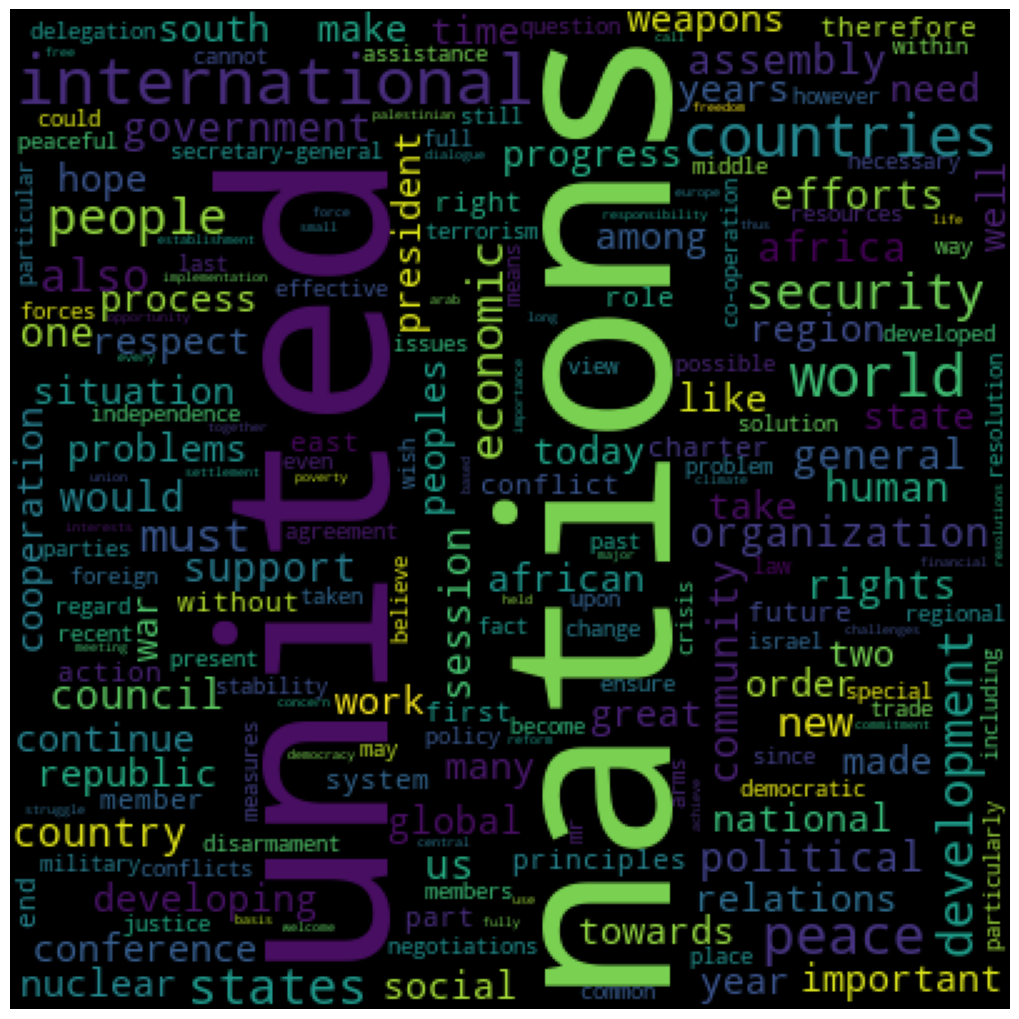

In [10]:
# Import the WordCloud class from the wordcloud module and the pyplot module from matplotlib.
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Create a WordCloud object with specified parameters (background color, width, height, margin).
wc = WordCloud(background_color='black', width=400, height=400, margin=2)

# Generate the word cloud based on the frequency dictionary obtained from freq_df, where the frequencies are converted to a dictionary.
wc.fit_words(freq_df['freq'].to_dict())

# Create a new figure with specified size and no background color.
plt.figure(figsize=(10, 10), facecolor=None)

# Display the word cloud image using imshow() function.
plt.imshow(wc)

# Turn off axis.
plt.axis("off")

# Adjust the layout for better appearance.
plt.tight_layout(pad=0)

# Show the word cloud.
plt.show()


# IDF Computation Function

In [12]:
# Import necessary libraries.
import numpy as np
from collections import Counter

# Define a function to compute IDF (Inverse Document Frequency) values for tokens in a DataFrame.
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    # Define an inner function to update the counter with tokens from each document.
    def update(doc):
        tokens = doc
        # If a preprocessing function is provided, apply it to the tokens.
        if preprocess is None:
            pass
        else:
            preprocess(doc)
        # Update the counter with the set of tokens in the document.
        counter.update(set(tokens))  # count tokens

    # Initialize a Counter object to count the document frequency of tokens.
    counter = Counter()
    
    # Apply the update function to each document in the specified column of the DataFrame.
    df[column].map(update)  # create data frame and compute idf

    # Convert the counter to a DataFrame with token document frequencies (df).
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    
    # Filter the DataFrame to include only tokens with a document frequency greater than or equal to min_df.
    idf_df = idf_df.query('df >= @min_df')
    
    # Compute IDF values using the formula and add a small constant (0.1) to avoid division by zero.
    idf_df['idf'] = np.log(len(df) / idf_df['df']) + 0.1
    
    # Set the index name of the DataFrame to 'token'.
    idf_df.index.name = 'token'
    
    # Return the DataFrame containing IDF values for tokens.
    return idf_df

# Compute IDF values for tokens in the DataFrame 'df'.
idf_df = compute_idf(df)


# TF-IDF Calculation

In [13]:
# Calculate the TF-IDF values by multiplying the token frequency (freq) from freq_df with the IDF score (idf) from idf_df.
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

# Display the first few rows of the DataFrame to inspect the computed TF-IDF values.
freq_df.head()



,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


# TF-IDF Word Cloud Visualization

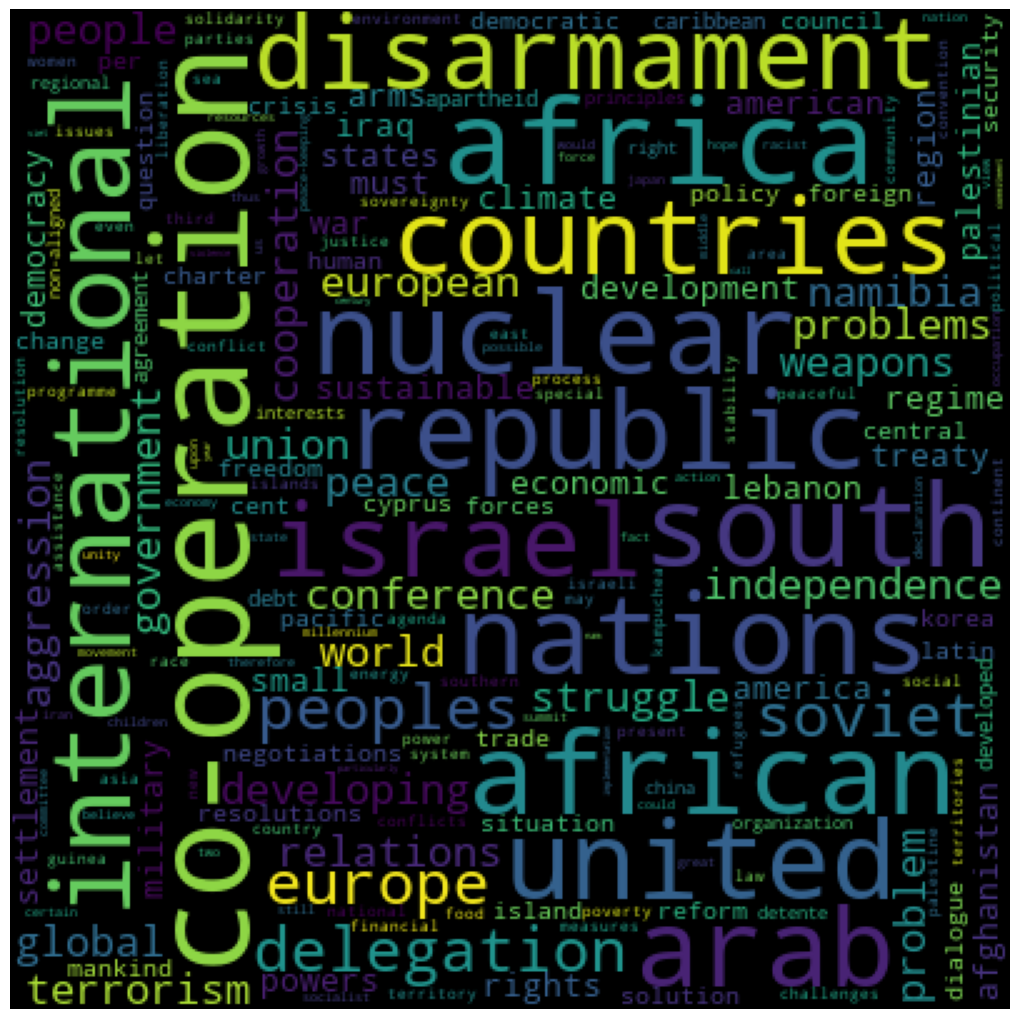

In [14]:
# Create a WordCloud object with specified parameters (background color, width, height, margin).
wc = WordCloud(background_color='black', width=400, height=400, margin=2)

# Fit the WordCloud object with TF-IDF values converted to a dictionary.
wc.fit_words(freq_df['tfidf'].to_dict())

# Create a new figure with specified size and no background color.
plt.figure(figsize=(10, 10), facecolor=None)

# Display the word cloud image using imshow() function.
plt.imshow(wc)

# Turn off axis.
plt.axis("off")

# Adjust the layout for better appearance.
plt.tight_layout(pad=0)

# Show the word cloud.
plt.show()


# Filtering Data for the Year 1970

In [15]:
# Import the pandas library.
import pandas as pd

# Define the file path to the CSV file containing the data.
file = "/Users/yathisha/Downloads/un-general-debates-blueprint.csv"

# Read the CSV file into a pandas DataFrame.
df = pd.read_csv(file)

# Filter the DataFrame to include only rows where the 'year' column is equal to 1970.
df = df[df['year'] == 1970]

# Display the first 20 rows of the filtered DataFrame to inspect the data.
df.head(20)


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


In [16]:
from collections import Counter


# Token DataFrame Creation

In [17]:
import pandas as pd

# Assuming you have a list of tokens and keywords
tokens = ['token1', 'token2', 'token3', 'token4']
keywords = ['keyword1', 'keyword2', 'keyword3']

# Creating a DataFrame
df = pd.DataFrame({'tokens': [tokens]})

# Adding a column for the number of tokens
df['num_tokens'] = df['tokens'].map(len)


# Keyword Counting Function

In [18]:
# Import the Counter class from the collections module.
from collections import Counter

# Define a function count_keywords that takes a list of tokens and a list of keywords as input.
def count_keywords(tokens, keywords):
    # Filter the tokens to include only those that are also present in the list of keywords.
    tokens = [t for t in tokens if t in keywords]
    # Count the occurrences of each token using Counter.
    counter = Counter(tokens)
    # If a keyword is not found in the tokens, return 0.
    return [counter.get(k, 0) for k in keywords]

# Apply the count_keywords function to the first list of tokens in the 'tokens' column of the DataFrame df.
result = count_keywords(df['tokens'][0], keywords)

# Print the result, which is a list containing the counts of each keyword in the tokens.
print(result)


[0, 0, 0]


# Keyword Counting within Groups Function

In [19]:
# Define a function to count occurrences of keywords within groups defined by certain columns in a DataFrame.
def count_keywords_by(df, by, keywords, column='tokens'):
    # Reset the index of the DataFrame to ensure consistent indexing.
    df = df.reset_index(drop=True)
    
    # Apply the count_keywords function to each row in the specified column, creating a frequency matrix.
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    
    # Convert the frequency matrix into a DataFrame with columns representing the keywords.
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    
    # Copy the grouping column(s) from the original DataFrame to the frequency DataFrame.
    freq_df[by] = df[by]
    
    # sort the DataFrame based on the values in the 'by' column(s).
    return freq_df.groupby(by=by).sum().sort_values(by=by)

